<a href="https://colab.research.google.com/github/Alam710/Object-Oriented-programming/blob/main/Nomor_2_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/PositionSalaries_Data.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values


dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
dataset.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

## Training the Polynomial Regression model on the whole dataset


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

## Predicting the Results

In [ ]:
y_pred = lin_reg.predict(poly_reg.fit_transform(X))

## Comparing the Real Values with Predicted Values

In [ ]:
df = pd.DataFrame({'Real Values':y, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,45000,53356.643357
1,50000,31759.906760
2,60000,58642.191142
3,80000,94632.867133
4,110000,121724.941725
5,150000,143275.058275
6,200000,184003.496504
7,300000,289994.172494
8,500000,528694.638695
9,1000000,988916.083916


## Visualising the Polynomial Regression results

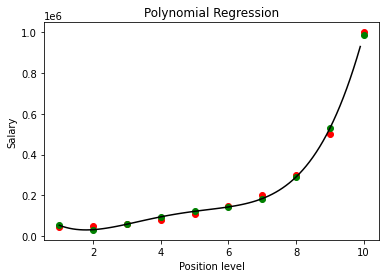

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.scatter(X, y_pred, color = 'green')
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'black')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Answer From Scratch using Python 

In [ ]:
# Importing libraries
 
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
# Univariate Polynomial Regression
 
class PolynomailRegression() :
     
    def __init__( self, degree, learning_rate, iterations ) :
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    # function to transform X
    def transform( self, X ) :
        # initialize X_transform
        X_transform = np.ones( ( self.m, 1 ) ) 
        j = 0
        for j in range( self.degree + 1 ) :  
            if j != 0 :
                x_pow = np.power( X, j )
                # append x_pow to X_transform
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
        return X_transform  
    
    # function to normalize X_transform 
    def normalize( self, X ) :
        X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
        return X
   
    # model training
    def fit( self, X, Y ) :
        self.X = X
        self.Y = Y
        self.m, self.n = self.X.shape
        # weight initialization
        self.W = np.zeros( self.degree + 1 )
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        X_transform = self.transform( self.X )   
        # normalize X_transform
        X_normalize = self.normalize( X_transform )       
        # gradient descent learning
        for i in range( self.iterations ) :  
            h = self.predict( self.X )
            error = h - self.Y
            # update weights
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error )
        return self
    
    # predict  
    def predict( self, X ) :
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        X_transform = self.transform( X )
        X_normalize = self.normalize( X_transform )
        return np.dot( X_transform, self.W )
       
       
# Driver code    

In [ ]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

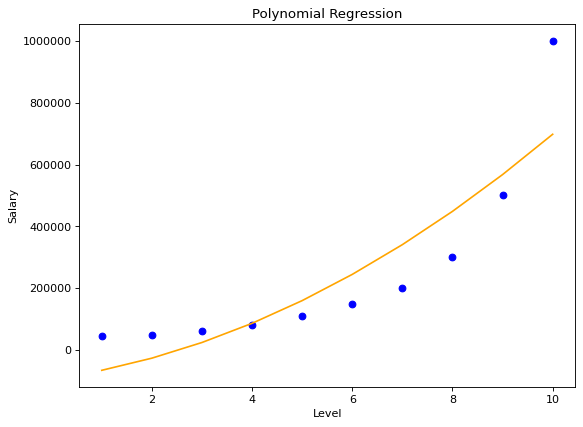

In [ ]:
def main() :   
     
    # Create dataset
    #X = np.array( [ [1], [2], [3], [4], [5], [6], [7] ] )
    #Y = np.array( [ 45000, 50000, 60000, 80000, 110000, 150000, 200000 ] )
  
    # model training
    model = PolynomailRegression( degree = 2, learning_rate = 0.01, iterations = 500 )
    model.fit(X,y)
    # Prediction on training set
    Y_pred = model.predict( X )

    # Visualization
    plt.figure(figsize=(8, 6), dpi=80)
    plt.scatter( X, y, color = 'blue' )
    plt.plot( X, Y_pred, color = 'orange' )
    plt.title( 'Polynomial Regression' )
    plt.xlabel( 'Level' )
    plt.ylabel( 'Salary' )
    plt.ticklabel_format(style='plain')
    plt.show()
 
 
if __name__ == "__main__" :
     
    main()